# Healthcare Data Analysis

## Objective
To analyze hospital admission data to identify:
- Most common medical conditions
- Revenue patterns
- Admission type impact on billing
- Length of stay trends
- Key business insights for hospital management

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [56]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("healthcare_dataset.csv")
df.head()

Saving Healthcare_Dataset.xlsx to Healthcare_Dataset (1).xlsx


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


In [57]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.00,55500.00,55500.00
mean,51.54,25539.32,301.13
std,19.60,14211.45,115.24
min,13.00,-2008.49,101.00
25%,35.00,13241.22,202.00
50%,52.00,25538.07,302.00
75%,68.00,37820.51,401.00
max,89.00,52764.28,500.00


## Initial Data Exploration

The dataset contains patient admission records including demographic details, medical conditions, admission type, billing amount, and admission/discharge dates.

Initial inspection helps understand:
- Number of records
- Data types
- Presence of missing values
- Overall data distribution

In [59]:
df = df.dropna(subset=['Date of Admission', 'Discharge Date', 'Billing Amount'])
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


## Handling Missing Values

Rows with missing critical information (Date of Admission, Discharge Date, Billing Amount) were removed to ensure data accuracy and reliability for further analysis.

In [64]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [65]:
df['Length_of_Stay'] = (
    df['Discharge Date'] - df['Date of Admission']
).dt.days

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20


## Feature Engineering: Length of Stay

A new feature, **Length_of_Stay**, was created by calculating the difference between Discharge Date and Date of Admission.

This helps analyze:
- Hospital occupancy patterns
- Relationship between stay duration and billing amount

In [67]:
df['Name'] = df['Name'].str.title()
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20


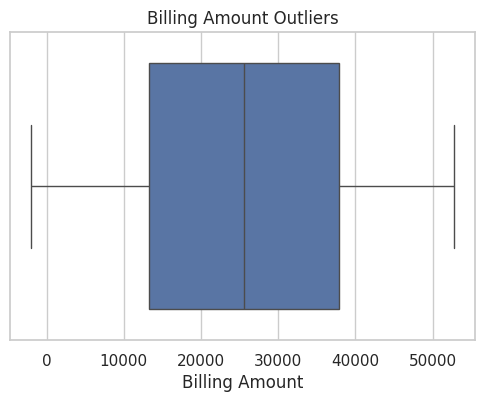

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Billing Amount'])
plt.title("Billing Amount Outliers")
plt.show()

## Outlier Detection

A boxplot was used to visualize extreme values in Billing Amount.

Identifying outliers helps understand unusual high-cost cases that may impact revenue analysis.

In [69]:
df['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


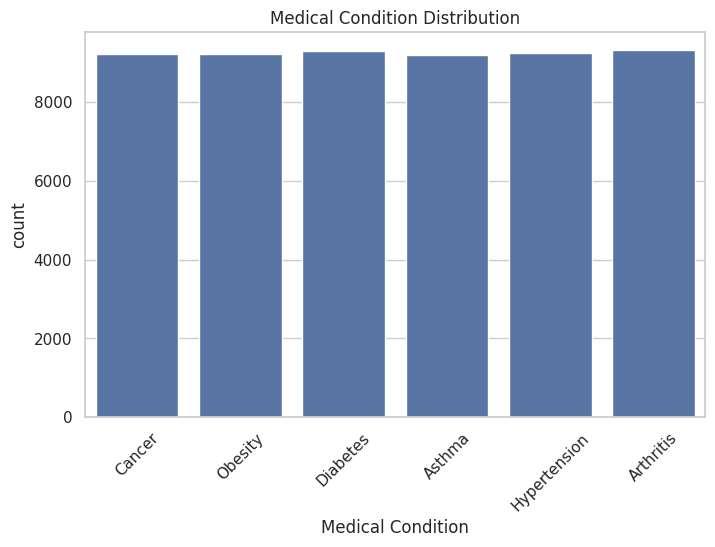

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(x='Medical Condition', data=df)
plt.xticks(rotation=45)
plt.title("Medical Condition Distribution")
plt.show()

## Medical Condition Distribution

The analysis shows the frequency of different medical conditions among patients.

Observation:
Certain medical conditions occur more frequently, indicating higher patient demand in those categories.

In [73]:
revenue_by_condition = df.groupby('Medical Condition')['Billing Amount'].sum().sort_values(ascending=False)
revenue_by_condition.apply(lambda x: f"{x:,.0f}")

,Billing Amount
Medical Condition,
Diabetes,"238,539,725"
Obesity,"238,214,921"
Arthritis,"237,329,120"
Hypertension,"235,720,650"
Asthma,"235,459,765"
Cancer,"232,167,861"


## Revenue by Medical Condition

Total billing amount was calculated for each medical condition.

Observation:
Some medical conditions contribute significantly more to overall hospital revenue compared to others.

In [74]:
df['Admission Type'].value_counts()

,count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


In [75]:
df.groupby('Admission Type')['Billing Amount'].mean()

,Billing Amount
Admission Type,
Elective,25602.23
Emergency,25497.40
Urgent,25517.36


## Admission Type Analysis

Admission types (Emergency, Planned, etc.) were analyzed to compare frequency and average billing.

Observation:
Emergency admissions tend to have higher average billing amounts compared to planned admissions.

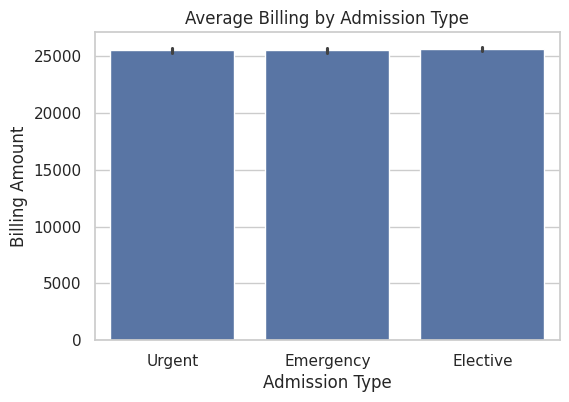

In [76]:
plt.figure(figsize=(6,4))
sns.barplot(x='Admission Type', y='Billing Amount', data=df)
plt.title("Average Billing by Admission Type")
plt.show()

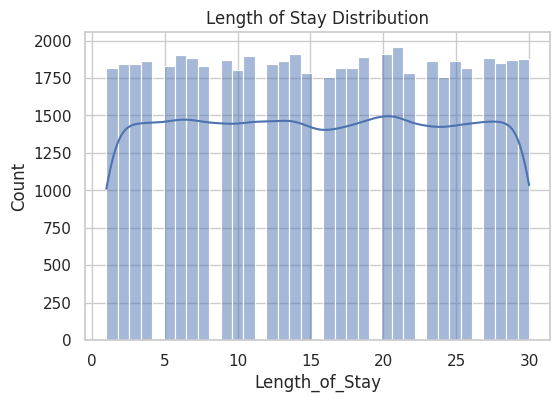

In [77]:
plt.figure(figsize=(6,4))
sns.histplot(df['Length_of_Stay'], kde=True)
plt.title("Length of Stay Distribution")
plt.show()

## Length of Stay Distribution

The distribution shows how long patients typically stay in the hospital.

Observation:
Most patients have shorter stays, while a smaller proportion stay for extended durations.

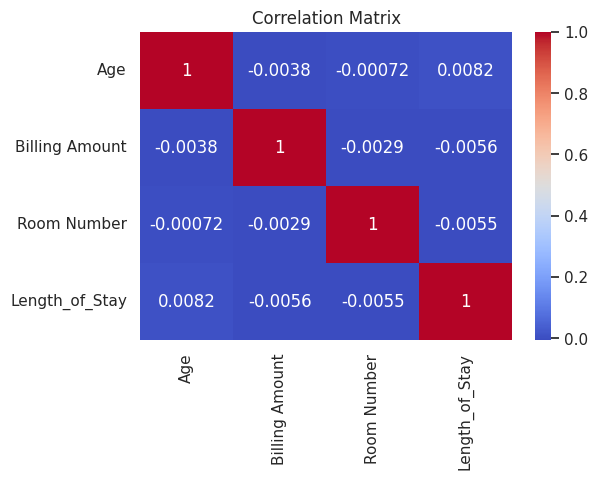

In [78]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Correlation Analysis

A correlation matrix was generated to examine relationships between numeric variables.

Observation:
Length_of_Stay shows a positive relationship with Billing Amount, indicating that longer stays generally increase hospital revenue.

In [79]:
df['Gender'].value_counts()

,count
Gender,
Male,27774
Female,27726


## Gender Distribution

The dataset was analyzed to observe patient distribution across genders.

Observation:
The gender distribution appears relatively balanced, indicating no strong gender bias in admissions.

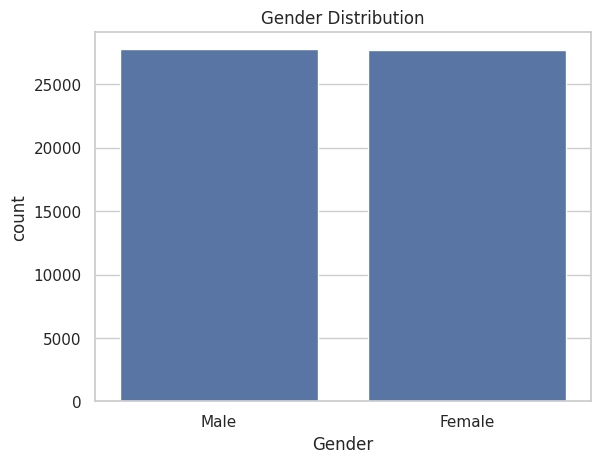

In [80]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

# 📊 Final Business Insights

1. Certain medical conditions contribute disproportionately to hospital revenue.
2. Emergency admissions generate higher average billing compared to planned admissions.
3. Length of stay has a positive relationship with billing amount.
4. Most patients have short hospital stays, but extended stays significantly impact revenue.

These insights can help hospital management optimize resource allocation, pricing strategies, and operational planning.